# Load Packages

In [ ]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [ ]:
# Load additional scikit learn packages! if you need
import sklearn

# Load Data Points (Do not modify the following block)

In [110]:

image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

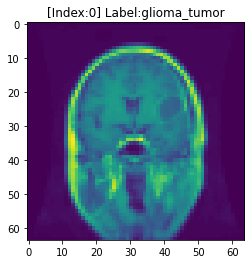

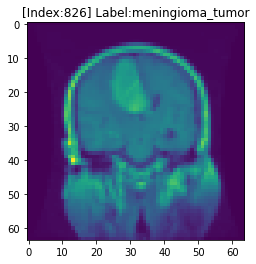

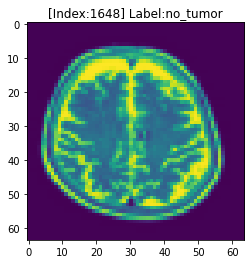

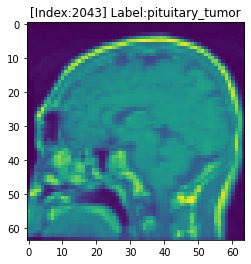

In [111]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [112]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

In [85]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = { 'max_iter': [1000,1200,1500],
#  'learning_rate': [0.1],
#  'max_depth' : [25, 50, 75],
#  'l2_regularization': [1.5],
#  'random_state' : [42]

# }

In [113]:

#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
#2. Fit the object to training dataset
#3. Predict the label of test data point (X_test)
# - Do not change the variable name 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier,HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.datasets  import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import NuSVC, SVC,LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.experimental import enable_hist_gradient_boosting 
# knn=KNeighborsClassifier(metric ='manhattan', n_neighbors=1, weights = 'uniform', n_jobs=-1)
# from sklearn.multioutput import MultiOutputClassifier
# kf = KFold(random_state=30,
#          n_splits=20,
#          shuffle=True
#         )
# rs=GridSearchCV(rn,param_grid, cv=5, verbose=2,refit=True, n_jobs=-1)
# voting_model = VotingClassifier([('rs',rs),('knn',knn)],voting='soft')
# cf=MultiOutputClassifier(voting_model, n_jobs=-1)
# rs=svm.SVC(kernel="rbf",C=10, max_iter=1000)
# estimators = [
#     ("rf", RandomForestClassifier(n_estimators=10, random_state=42)),
#     ("rs",HistGradientBoostingClassifier(random_state=3))
# ]
# clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
estimators = [
       ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
       ('ex',ExtraTreesClassifier(random_state=42,n_estimators=1000,verbose=1 )),
       ('svr', make_pipeline(StandardScaler(), LinearSVC(C=100,random_state=42))),
       ('knn',KNeighborsClassifier(metric ='manhattan', n_neighbors=1, weights = 'uniform', n_jobs=-1)),
       ]
clf = StackingClassifier(n_jobs=-1, cv=20,
estimators=estimators, final_estimator= HistGradientBoostingClassifier(random_state=42)
)
clf.fit(X_train, y_train)

y_pred =clf .predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


Print accuracy (do not modify the following block)

*   항목 추가
*   항목 추가



In [115]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93
